Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [3]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

### Name: Ciro Salcedo

#### Collaborators: Ceasar Stringfield, Yelissa Lopez

# HW 4:  Interpolation

## Question 1

[10] The $n$th Chebyshev polynomial is characterized (up to a constant) by the identity

$$T_n(\cos \theta) = \cos (n \theta)$$

Use this identity to show that the Chebyshev polynomials are orthogonal on $x\in[-1,1]$ with respect to the weight

$$w(x) = \frac{1}{\sqrt{1 - x^2}}$$

To do this you must prove that

$$\int^1_{-1} w(x) T_n(x) T_m(x) dx = \left \{ \begin{aligned} 
a & ~ & m = n \\ 
0 & ~ & m \neq n 
\end{aligned} \right .$$

where $a$ is a finite constant (also find this coefficient).  Note that you may have multiple non-zero coefficients $a$.  Make sure to cover all these cases and list the conditions that you will find these values.

$$\int^1_{-1} w(x) T_n(x) T_m(x) dx = \int^1_{-1} \frac{1}{\sqrt{1 + \cos^2 \theta}} T_n(\cos \theta) T_m(\cos \theta) dx $$

Let $ dx = -\sin \theta d \theta$ 

$$\int^1_{-1} w(x) T_n(x) T_m(x) dx = \int^0_{\pi} \frac{-1}{\sqrt{1 + \cos^2 \theta}} \cos(n \theta) \cos (m \theta) \sin \theta d\theta $$

$$\int^0_{\pi} \frac{-1}{\sqrt{1 + \cos^2 \theta}} \cos(n \theta) \cos (m \theta) \sin \theta d\theta  = \int^\pi_{0} \frac{ \sin \theta}{\sqrt{1 + \cos^2 \theta}} \cos(n \theta) \cos (m \theta) d\theta$$

$$ = \int^0_{\pi} \frac{\sin \theta d\theta}{\sin \theta} \cos(n \theta) \cos (m \theta)   = \int^\pi_{0} \cos(n \theta) \cos (m \theta) d\theta$$

If m = n:

$$= \int^\pi_{0} \cos^2(n \theta) d\theta = [\frac{sin(2n\theta)}{4n} + \frac{x}{2}] |^\pi_0 = \frac{\pi}{2} = a$$

otherwise:
$$= \int^\pi_{0} \cos(n \theta) \cos(m \theta) d\theta = [\frac{sin((n+m)\theta)}{2(n+m)} + \frac{sin((n-m)\theta)}{2(n-m)}] |^\pi_0 = \frac{\pi}{2} = 0$$

## Question 2

We discussed in class that equally spaced points are not optimal and in fact the Lagrange interpolants can vary considerably from 1 near the ends.  For these questions consider the interval $x\in[-1, 1]$.

**(a)** [10] For $N = 4$ find the position and value of the maximum value on $[-1,1]$ of $|\ell_k(x)|$ analytically for $\ell_2(x)$ using equi-spaced points (extra credit for finding them for all analytically).

Using equally spaced points, $x_i = {-1, -0.5, 0, 0.5, 1}$

$$\ell_2(x) = \prod^4_{j = 0, j\neq i} \frac{x-x_j}{x_i-x_j}$$ 

$$ \ell_2(x) = \frac{x + 1}{0 + 1} \frac{x + 0.5}{0 + 0.5} \frac{x - 0.5}{0 + 0.5} \frac{x - 1}{0 - 1}$$

$$ =(x - 1)(x + 1)(2x - 1)(2x + 1) = 4x^4 - 5x^2 + 1$$ 

$$ = (x - 1)(4x^3 + 4x^2 -x - 1) = (x-1)(x_1)(4x^2 - 1) = (x-1)(x+1)(2x-1)(2x+1)$$

Don't know why I bothered to factor, but

$$\frac{d}{dx}(4x^4 - 5x^2 + 1) = 12x^3 - 10x = 0$$ x = 0 is the maximum, y =1

$$\ell_1(x) = \prod^4_{j = 0, j\neq i} \frac{x-x_j}{x_i-x_j}$$ 

$$ \ell_1(x) = \frac{x + 1}{-0.5 + 1} \frac{x - 0}{-0.5 + 0} \frac{x - 0.5}{-0.5 - 0.5} \frac{x - 1}{0.5 - 1}$$

$$ \ell_1(x) =
-\frac{8}{3}x^4 + \frac{4}{3}x^3 + \frac{8}{3}x^2 - \frac{4}{3}x$$ 

max (-2/3 , 1.152)

$$ \ell_3(x) =
-\frac{8}{3}x^4 - \frac{4}{3}x^3 + \frac{8}{3}x^2 + \frac{4}{3}x$$ 

max (2/3 , 1.152)

$$ \ell_4(x) =
\frac{2}{3}x^4 + \frac{2}{3}x^3 - \frac{1}{6}x^2 - \frac{1}{6}x$$ 

max (1 , 1)


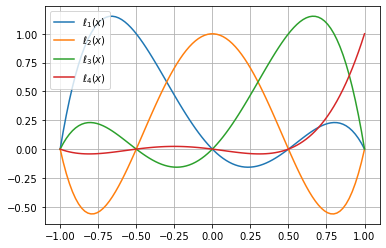

In [11]:
x = numpy.linspace(-1,1,100)
y1 = 4*x**4 - 5*x**2 + 1
y2 = (-8/3)*(x**4) + (4/3)*(x**3) + (8/3)*(x**2) - (4/3)*x
y3 = (-8/3)*(x**4) - (4/3)*(x**3) + (8/3)*(x**2) + (4/3)*x
y4 = (2/3)*(x**4) + (2/3)*(x**3) - (1/6)*(x**2) - (1/6)*x

plt.plot(x,y2,label="$\ell_1(x)$")
plt.plot(x,y1,label="$\ell_2(x)$")
plt.plot(x,y3,label="$\ell_3(x)$")
plt.plot(x,y4,label="$\ell_4(x)$")
plt.legend(loc='best')
plt.grid()

**(b)** [10] Estimate $\max |\ell_k(x)|$ for $N > 2$ by writing a function that returns the maximum absolute value of all Lagrange basis functions for $N$ evenly spaced points.  Note that $N$ is the polynomial order, not the number of points.  Use
```python
x = numpy.linspace(-1, 1, 100)
```
to evaluate the polynomial.  Also it may be helpful to plot the basis and the maximum found to check your answer:
```python
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, lagrange_basis)
axes.plot(x_max, lagrange_basis_max, 'ko')
```

In [185]:
def lagrange_basis(x, data):
    """Compute Lagrange basis at x given data"""
    basis = numpy.ones((data.shape[0], x.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i != j:
                basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])
    return basis

def max_equal_basis(N):
    r"""Compute the maximum amplitude of the Lagrange
    polynomial basis of degree *N*
    
    """
    x = numpy.linspace(-1, 1, 100)
    
    # YOUR CODE HERE    
    x_data = [-1.]
    increment = 2/N #distance between points
    
    #this gives the x_data which is the same as x when N = 100
    for i in range(N-1):
        x_data.append(x_data[i]+increment)
    x_data.append(1.)
    
    x_data = numpy.array(x_data)
    y_data = numpy.ones(len(x_data))
    
    data = numpy.array([x_data,y_data]).T
    basis = lagrange_basis(x,data)
    
    return max([max(abs(b)) for b in basis])

In [186]:
N = [2, 4, 6, 8, 10, 12, 20, 30, 40]
max_value = numpy.empty(len(N))
for (i, n) in enumerate(N):
    max_value[i] = max_equal_basis(n)
numpy.testing.assert_allclose(max_value, [1.00000000e+00, 1.15204532e+00, 1.36216139e+00, 
                                          2.54889859e+00, 6.50684027e+00, 1.80407350e+01, 
                                          1.79785431e+03, 8.77912809e+05, 4.27506380e+08])

print("Success!")

Success!


**(c)** [5] Repeat part **b** but with Chebyshev points.  Note that these are Lagrangian basis functions using Chebyshev points (or nodes) rather than the Chebyshev polynomial basis.  Again use the plotting code above if you need to debug.

In [187]:
def max_chebyshev_basis(N):
    """Using Chebyshev nodes and the corresponding Lagrangian basis
    compute the maximum amplitude of the basis function of degree *N*.
    """
    x = numpy.linspace(-1, 1, 100)
    
    # YOUR CODE HERE    
    num = numpy.arange(1,N+2,1)
    x_data = numpy.cos(((2*num-1)*numpy.pi)/(2*N+2))
    
    #num = numpy.arange(1,N+1,1)
    #x_data = numpy.cos(((2*num-1)*numpy.pi)/(2*N))
    
    x_data = numpy.array(x_data)
    y_data = numpy.ones(len(x_data))
    
    data = numpy.array([x_data,y_data]).T
    basis = lagrange_basis(x,data)
    
    return max([max(abs(b)) for b in basis])

In [191]:
N = [2, 4, 6, 8, 10, 12, 20, 30, 40]
max_value = numpy.empty(len(N))
for (i, n) in enumerate(N):
    max_value[i] = max_chebyshev_basis(n)

numpy.testing.assert_allclose(max_value, [1.24401694, 1.2627503, 1.26789221, 1.27000581, 
                                          1.27107518, 1.27169006, 1.27264584, 1.27296711,
                                          1.2730838])

print("Success!")

Success!


**(d)** [5] Plot a comparison of the results (on the same plot) from part **b** and **c** using the same values of N.  Make sure to use a `semilogy` plot so that the values are vieable (at least for one of the series).

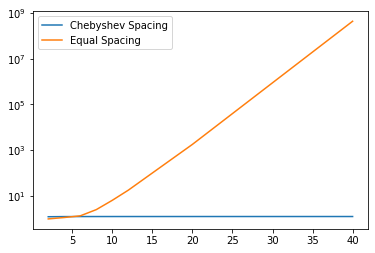

In [194]:
# YOUR CODE HERE
N = [2, 4, 6, 8, 10, 12, 20, 30, 40]

c_max_value = numpy.empty(len(N))
for (i, n) in enumerate(N):
    c_max_value[i] = max_chebyshev_basis(n)

l_max_value = numpy.empty(len(N))
for (i, n) in enumerate(N):
    l_max_value[i] = max_equal_basis(n)

plt.semilogy(N, c_max_value, label="Chebyshev Spacing")
plt.semilogy(N, l_max_value, label="Equal Spacing")

plt.legend()

## Question 3

Consider the Lebesgue function
$$
\lambda_N(x)  = \sum_{i=0}^N\big{|}\ell_i(x)\big{|}
$$
where $\ell_i(x)$ are Lagrange basis functions for a given set of $x_i$.  The maximum of the Lebesgue function is called $\Lambda_n$ the Lebesgue constant and have a clear connection to Lagrangian interpolation as they provide a first estimate for the interpolation error.  Unfortunately, $\Lambda_N$ is not uniformly bounded regardless of the nodes used as one can show that 
$$
    \Lambda_N > \mathcal{O}(\log N) ~~~\text{as}~~~ N \rightarrow \infty
$$

Note, $\Lambda_n$ is the infinite-norm of the linear operator mapping data to interpolant on the given grid and interval.

**(a)** [5] What do you expect the Lebesgue function to look like?  Are there key points where we will know the function value exactly?

I expect the Lebesque function too look like a series of non-overlapping humps. Due to the a special property of the Lagrange basis functions, I know that the value of $\lambda_N(x_i)  = \sum_{i=0}^N\big{|}\ell_i(x_i)\big{|}$ reduces simply to $\lambda_N(x_i)  = \delta_{ii} = 1$. This means the relative maxima of the Lebesque function will be given by the points $x_i$. 


$$
    \ell_i(x_j) = \delta_{ij} = \left\{\begin{matrix}
            0 & i\neq j \\ 
            1 & i=j\\
            \end{matrix}\right.
$$

**(b)** [10] Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ with
$$
    x_i = -1 + \frac{2 i}{N}, ~~~ i = 0, 1, \ldots, N.
$$
For the case where $N = 20$ comment on what you see (you may need to use `semilogy` to see the results).

In [4]:
# YOUR CODE HERE
def lagrange_basis(x, data):
    """Compute Lagrange basis at x given data"""
    basis = numpy.ones((data.shape[0], x.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i != j:
                basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])
    return basis

def lebesgue(x, data):
    """Compute Lebesgue basis at x given data"""
    P = numpy.zeros(x.shape[0])
    basis = lagrange_basis(x, data)
    for n in range(data.shape[0]):
        P += abs(basis[n, :] * data[n, 1])
    return P

def data_equidis(m):
    x = numpy.empty(m + 1)
    y = numpy.ones(x.shape)
    for i in range(m + 1):
        x[i] = -1 + (2 * i)/m
    data = numpy.array([x, y]).T
    return data

def data_cheb(m):
    x = numpy.empty(m + 1)
    y = numpy.ones(x.shape)
    for i in range(m + 1):
        x[i] = numpy.cos((2.0 * i) / (2.0 * m) * numpy.pi)
    data = numpy.array([x, y]).T
    return data



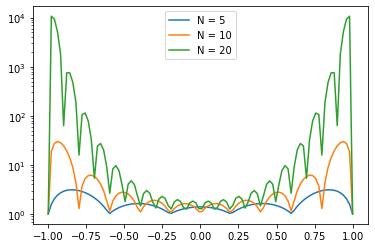

In [17]:
n = 5,10,20
for N in n:
    plt.semilogy(x, lebesgue(x, data_equidis(N)),label="N = %d" %N)
plt.legend()

Error significantly increases towards the outer boundaries

**(c)** [5] Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ with
$$
    x_i = \cos\left( \frac{(2i - 1) \pi}{2 N} \right ) ~~~ i = 1, \ldots, N.
$$
Again comment on what you see in the case $N = 20$.

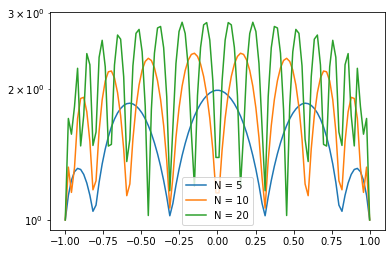

In [7]:
n =[5,10,20]

for N in n:   
    plt.semilogy(x, lebesgue(x, data_cheb(N)),label="N = %d" %N)
plt.legend()

**(d)** [5] What do you observe about the Lebesgue function for each of the distribution of points?

For the equispaced points, the polynomial interpolation is ill-conditioned. As n increases the value of the function balloons. For the Chebyshev points, the function drops off logarithmically, demonstrating that it is a better spacing for interpolation.

**(e)** [5] Using suitable values for $N$ plot the Lebesgue constants of each of the above cases.  Make sure to use a suitably large number of points to evaluate the function.  Graphically demonstrate that the constant grow with the predicted growth rate $\mathcal{O}(\log N)$ keeping in mind that there may be a constant out in front of the $\log N$ term.  Describe what you observe.

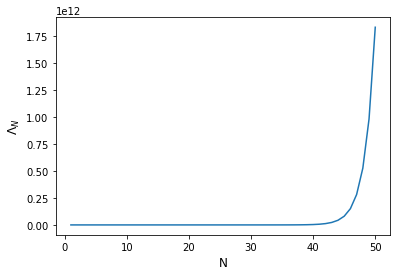

In [16]:
# YOUR CODE HERE
M = 50
n = numpy.arange(1, M + 1)
A_equi = numpy.empty(M)
A_cheb = numpy.empty(M)
for i in range(0, M):
    A_equi[i] = lebesgue(x, data_equidis(i + 1)).max()
    A_cheb[i] = lebesgue(x, data_cheb(i + 1)).max()

plt.xlabel("N", fontsize=12)
plt.ylabel("$\Lambda_{N}$", fontsize=12)
plt.plot(n, A_equi, label = "$\Lambda_{N}$ (Equidistant points)")

plt.show()


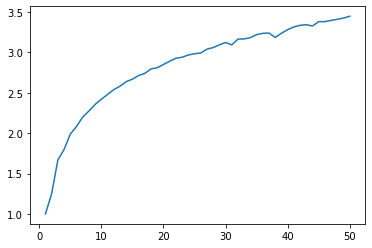

In [15]:
plt.plot(n, A_cheb, label = "$\Lambda_{N}$ (Chebyshev points)")

Error grows logarithmically with Chebyshev points but grows exponentially with equidistant points

## Question 4

In lecture we constructed the system of equations we need to solve for each interval if we wanted to use a piece-wise cubic function and have an interpolant that is $C^1$.  This questions addresses the details of that derivation.

**(a)** [5] Let $x \in [x_k, x_{k+1}] = X$ and $s \in [0, 1] = S$.  Write down the transformation we need to map the $X$ and $S$ to each other, i.e. $T:X \rightarrow S$, along with its inverse $T^{-1}$.

$$ T(x) = mx+b,  T(x) = \frac{1}{x_{k+1} + x_k} x - \frac{x}{x_{k+1} + x_k}$$

$$ T(x) = \frac{x - x_k}{x_{k+1} + x_k} $$

Similarly

$$ T^{-1}(s) = (x_{k+1} - x_k)s + x_k = s \Delta x + x_k = x_k + s(x_{k+1} - x _k)$$

**(b)** [15] After making the transformation of the equations we found that the system of equations that result are
$$\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 \\
    0 & 1 & 0 & 0 \\
    0 & 1 & 2 & 3
\end{bmatrix} \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} = \begin{bmatrix}
y_k \\ y_{k+1} \\ d_k \\ d_{k+1}
\end{bmatrix}$$
Show that the solution is
$$
    \mathcal{P}(s) = (1-s)^2 (1 + 2s) y_k + s^2 (3 - 2 s) y_{k+1} + s (1 - s)^2 d_k - s^2 (1 - s)d_{k+1}
$$

Solve using the Inverse method,

The Inverse is 
$$\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    -3 & 3 & -2 & -1 \\
    2 & -2 & 1 & 1
\end{bmatrix}
$$

$$\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    -3 & 3 & -2 & -1 \\
    2 & -2 & 1 & 1
\end{bmatrix} \begin{bmatrix}
y_k \\ y_{k+1} \\ d_k \\ d_{k+1}
\end{bmatrix} = \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} $$

$$ \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} =  \begin{bmatrix}
y_k \\ d_k \\ -3y_k +3y_{k+1} -2d_k - d_{k+1} \\ 2y_k - 2y_{k+1} + d_k + d_{k+1} 
\end{bmatrix}$$



$$ P(s) = y_k + (d_k)s + (-3y_k +3y_{k+1} -2d_k - d_{k+1})s^2 + (2y_k - 2y_{k+1} + d_k + d_{k+1})s^3 $$

$$ P(s) = y_k (1 - 3s^2 + 2s^3) + y_{k+1} (3s^2 - 2s^3) + d_k(s - 2s^2) + d_{k+1} (s^3 - s^2)$$

$$
    \mathcal{P}(s) = (1-s)^2 (1 + 2s) y_k + s^2 (3 - 2 s) y_{k+1} + s (1 - s)^2 d_k - s^2 (1 - s)d_{k+1}
$$


In [1]:
# YOUR CODE HERE
#raise NotImplementedError()

**(c)** [10] Use $T^{-1}$ to transform back to $X$ and write down the polynomial in terms of the original variable $x$.

$$
\mathcal{P}(x) = (1-\frac{x - x_k}{x_{k+1} + x_k}))^2 (1 + 2(\frac{x - x_k}{x_{k+1} + x_k}) y_k + (\frac{x - x_k}{x_{k+1} + x_k})^2 (3 - 2 (\frac{x - x_k}{x_{k+1} + x_k})) y_{k+1} + (\frac{x - x_k}{x_{k+1} + x_k}) (1 - (\frac{x - x_k}{x_{k+1} + x_k}))^2 d_k - (\frac{x - x_k}{x_{k+1} + x_k})^2 (1 - (\frac{x - x_k}{x_{k+1} + x_k}))d_{k+1}
$$